<a href="https://colab.research.google.com/github/nikenoctaa/Estimation-ML-vs-DL/blob/master/Estimation_of_ML_vs_DL_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.offline as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 
from plotly import tools
import plotly.figure_factory as ff

import nltk
import re
import string

In [0]:
data=pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')

In [125]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


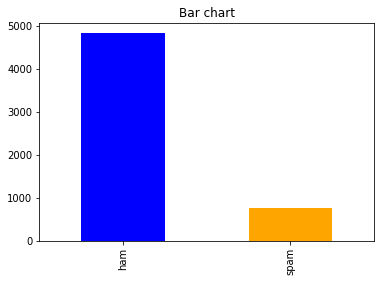

In [126]:
count_Class=pd.value_counts(data["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

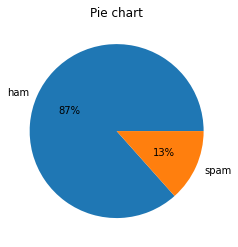

In [127]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [0]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [129]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [130]:
data.columns=['label','text']
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [131]:
data.text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [132]:
dir(string)

['Formatter',
 'Template',
 '_ChainMap',
 '_TemplateMetaclass',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_re',
 '_string',
 'ascii_letters',
 'ascii_lowercase',
 'ascii_uppercase',
 'capwords',
 'digits',
 'hexdigits',
 'octdigits',
 'printable',
 'punctuation',
 'whitespace']

In [133]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
def remove_punctuation(text):
    new_text=''.join([char for char in text if char not in string.punctuation])
    return new_text

In [0]:
data['new_text']=data['text'].apply(lambda row : remove_punctuation(row))

In [136]:
data.head()

,label,text,new_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [137]:
print(data.text[0])
data.new_text[0]

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [0]:
def tokenize(text):
    tokens=re.split('\W+',text)
    return tokens 

In [139]:
data['tokenized_text']=data['new_text'].apply(lambda row : tokenize(row.lower()))
data.head()

,label,text,new_text,tokenized_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [140]:
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')
#stopwords[:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def remove_stopwords(text):
    clean_text=[word for word in text if word not in stopwords]
    return clean_text 

In [142]:
data['clean_text']=data['tokenized_text'].apply(lambda row : remove_stopwords(row))
data.head()

,label,text,new_text,tokenized_text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


In [0]:
ps = nltk.PorterStemmer()

In [144]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [0]:
def stemming(tokenized_text):
    stemmed_text=[ps.stem(word) for word in tokenized_text]
    return stemmed_text

In [146]:
data['stemmed_text']=data.clean_text.apply(lambda row : stemming(row))
data[['text','stemmed_text']].head()

,text,stemmed_text
0,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,Ok lar... Joking wif u oni...,"[ok, lar, joke, wif, u, oni]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,U dun say so early hor... U c already then say...,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goe, usf, live, around, tho..."


In [0]:
def get_final_text(stemmed_text):
    final_text=" ".join([word for word in stemmed_text])
    return final_text

In [148]:
data['final_text']=data.stemmed_text.apply(lambda row : get_final_text(row))
data.head()

,label,text,new_text,tokenized_text,clean_text,stemmed_text,final_text
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though


**MACHINE** **LEARNING**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

In [0]:
count1 = Counter(" ".join(data[data['label']=='ham']["final_text"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['label']=='spam']["final_text"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

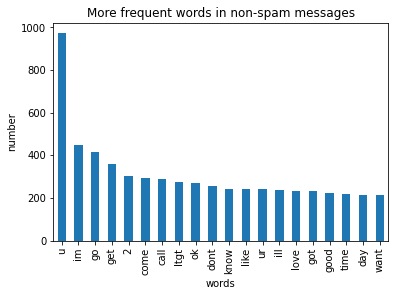

In [151]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

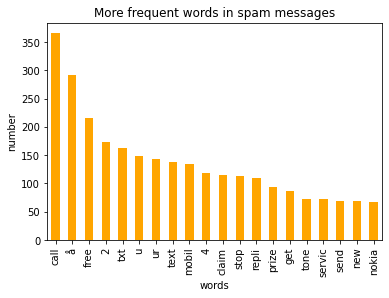

In [152]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [153]:
f = feature_extraction.text.CountVectorizer()
X = f.fit_transform(data["final_text"])
np.shape(X)

(5572, 8026)

In [154]:
data["label"]=data["label"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['label'], test_size=0.2, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(4457, 8026), (1115, 8026)]


*Multinomial Naive Bayes*

In [0]:
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

In [156]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.997756,0.976682,0.940000,0.892405
1,0.11001,0.995737,0.979372,0.966667,0.889571
2,0.22001,0.995513,0.982063,0.966667,0.906250
3,0.33001,0.995288,0.979372,0.960000,0.894410
4,0.44001,0.994166,0.979372,0.953333,0.899371
5,0.55001,0.993718,0.979372,0.946667,0.904459
6,0.66001,0.993493,0.979372,0.946667,0.904459
7,0.77001,0.993269,0.979372,0.940000,0.909677
8,0.88001,0.993045,0.978475,0.933333,0.909091
9,0.99001,0.993045,0.977578,0.920000,0.913907


In [157]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

alpha             19.800010
Train Accuracy     0.967018
Test Accuracy      0.961435
Test Recall        0.713333
Test Precision     1.000000
Name: 180, dtype: float64

In [158]:
models[models['Test Precision']==1].head(n=5)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
180,19.80001,0.967018,0.961435,0.713333,1.0
181,19.91001,0.967018,0.961435,0.713333,1.0


In [159]:
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
bayes = naive_bayes.MultinomialNB(alpha=list_alpha[best_index])
bayes.fit(X_train, y_train)
models.iloc[best_index, :]

alpha             19.800010
Train Accuracy     0.967018
Test Accuracy      0.961435
Test Recall        0.713333
Test Precision     1.000000
Name: 180, dtype: float64

In [160]:
from sklearn.metrics import classification_report
accuracyMNBC = print(classification_report(y_test,bayes.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.71      0.83       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



*Support Vector Machine*

In [0]:
list_C = np.arange(500, 2000, 100) #100000
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1 

In [162]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,1.0,0.974888,0.813333,1.0
1,600.0,1.0,0.974888,0.813333,1.0
2,700.0,1.0,0.974888,0.813333,1.0
3,800.0,1.0,0.974888,0.813333,1.0
4,900.0,1.0,0.974888,0.813333,1.0
5,1000.0,1.0,0.974888,0.813333,1.0
6,1100.0,1.0,0.974888,0.813333,1.0
7,1200.0,1.0,0.974888,0.813333,1.0
8,1300.0,1.0,0.974888,0.813333,1.0
9,1400.0,1.0,0.974888,0.813333,1.0


In [163]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

C                 500.000000
Train Accuracy      1.000000
Test Accuracy       0.974888
Test Recall         0.813333
Test Precision      1.000000
Name: 0, dtype: float64

In [164]:
models[models['Test Precision']==1].head(n=5)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,1.0,0.974888,0.813333,1.0
1,600.0,1.0,0.974888,0.813333,1.0
2,700.0,1.0,0.974888,0.813333,1.0
3,800.0,1.0,0.974888,0.813333,1.0
4,900.0,1.0,0.974888,0.813333,1.0


In [165]:
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
svc = svm.SVC(C=list_C[best_index])
svc.fit(X_train, y_train)
models.iloc[best_index, :]

C                 500.000000
Train Accuracy      1.000000
Test Accuracy       0.974888
Test Recall         0.813333
Test Precision      1.000000
Name: 0, dtype: float64

In [166]:
from sklearn.metrics import classification_report
accuracySVM = print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



**DEEP LEARNING**

*RNN*

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
import numpy as np

np.random.seed(7)

In [0]:
import pandas as pd

In [170]:
len(data['final_text'])

5572

In [171]:
data.head()

,label,text,new_text,tokenized_text,clean_text,stemmed_text,final_text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though


In [172]:
data['final_text'].head()

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri 2 wkli comp win fa cup final tkt 21...
3                  u dun say earli hor u c alreadi say
4            nah dont think goe usf live around though
Name: final_text, dtype: object

In [173]:
data.drop(['text' , 'new_text', 'tokenized_text', 'stemmed_text'],axis=1,inplace=True)
data.head()

,label,clean_text,final_text
0,0,"[go, jurong, point, crazy, available, bugis, n...",go jurong point crazi avail bugi n great world...
1,0,"[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni
2,1,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
3,0,"[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say
4,0,"[nah, dont, think, goes, usf, lives, around, t...",nah dont think goe usf live around though


In [174]:
data['label'].unique()

array([0, 1])

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 500

tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(data['final_text'].values)
X = tokenizer.texts_to_sequences(data['final_text'].values)
X = pad_sequences(X);

In [176]:
from sklearn.model_selection import train_test_split

Y = pd.get_dummies(data['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print('input_train shape:', X_train.shape)
print('input_test shape:', X_test.shape)

input_train shape: (4457, 48)
input_test shape: (1115, 48)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
import matplotlib.pyplot as plt

*Simple RNN*

In [178]:
model_RNN = Sequential()
model_RNN.add(Embedding(10000, 32))
model_RNN.add(SimpleRNN(32))
model_RNN.add(Dense(2, activation='sigmoid'))
model_RNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history_RNN = model_RNN.fit(X_train, Y_train,
                    epochs=5,
                    batch_size=512, #sekali proses jln 512
                    validation_split=0.2, #dataset dibagi antara training dan testing (80% buat training 20% buat testing)
                    validation_data=(X_test, Y_test))

Epoch 1/5
7/7 [==============================] - 0s 63ms/step - loss: 0.6210 - acc: 0.7077 - val_loss: 0.4932 - val_acc: 0.8621
Epoch 2/5
7/7 [==============================] - 0s 36ms/step - loss: 0.4339 - acc: 0.8670 - val_loss: 0.3919 - val_acc: 0.8621
Epoch 3/5
7/7 [==============================] - 0s 35ms/step - loss: 0.3680 - acc: 0.8729 - val_loss: 0.3473 - val_acc: 0.8621
Epoch 4/5
7/7 [==============================] - 0s 38ms/step - loss: 0.3421 - acc: 0.8757 - val_loss: 0.3488 - val_acc: 0.9305
Epoch 5/5
7/7 [==============================] - 0s 38ms/step - loss: 0.3131 - acc: 0.8962 - val_loss: 0.3052 - val_acc: 0.8621


In [179]:
loss_RNN, acc_RNN = model_RNN.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f" % (acc_RNN*100), "%")
print("Loss: %.2f" % (loss_RNN*100), "%")

Accuracy: 86.55 %
Loss: 30.62 %


In [180]:
from sklearn.metrics import classification_report
Y_pred = model_RNN.predict(X_test)
accuracyRNN = print(classification_report(Y_test.argmax(axis=1),Y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       965
           1       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115

